# Assignment 4: Derek Pyne

•Section 6.5 of the textbook covers how simulation can assist when one of the assumptions / requirements of the Chi-Square distribution are not met.

The example in the book works out how simulation can assist when the sample size in one of the bins is below 5, one of the requirements for the chi-square test to work.  A bin below five will make the underlying assumption of normality of the original variable to fail, thus the chi-square result will be flawed.  The simulation piece of the exercise is 6.5.2 Generating the null distribution and p-value by simulation.

•The text goes through a step by step explanation.  After the simulation, you can verify the number using the binomial distribution (one line of code).

•The assignment is to follow the steps using Python.  Results are given so you will now if you are in the right direction.

In [1]:
import random as rd
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

The average complication rate for liver donor surgeries is 10% in the US. We have a US physician here who is claiming that her facility is significantly safer then this average with only 3 complications in 62 surgeries.

Let's check this statement with a simulation.

We setup the simulation by defining a function that randomly performs $n$ trials with a $p$ probability of failure. The proportion of failures is then returned. We then run this simulation a large number of times and look at the resulting distribution.

In [2]:
n_of_trials = 62
p_of_failure = 0.1
def complicationSimulation(n, p):
    simulated_outcomes = np.array([rd.random() for _ in range(n)])
    return sum(simulated_outcomes < p) * 1.0 / len(simulated_outcomes)

sim_p_values = pd.DataFrame({'p_sim': [complicationSimulation(n_of_trials, p_of_failure) for _ in range(100000)]})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1045d8e10>]], dtype=object)

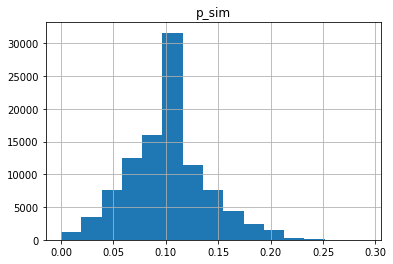

In [3]:
sim_p_values.hist(bins = 15)

We can then determine the p-value for this claim by finding the proportion of outcomes to the left of the physicians complication rate of $3/62$.

In [4]:
print('P-value: %s' % (sum(sim_p_values['p_sim'] <= (3.0/62)) * 1.0 / len(sim_p_values)))

P-value: 0.12313


We can check compare our simulated value with a calculated value using a binomial distribution.

In [5]:
print('P-value: %s' % (stats.binom(62,.1).cdf(3)))

P-value: 0.120978726746


Since this p-value is larger then the significance level of 0.05 we do not reject the null hypothesis.